### Setup


In [1]:
import googleapiclient.discovery
import pandas as pd
import re
import string
import spacy
import seaborn as sns

In [2]:
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "YOUR_DEVELOPER_KEY"

In [3]:
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

### Getting The 1st Debate Dataset


In [4]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="gUz_MgdwKg0",
    maxResults=1000
)
request

In [5]:
comments = []

In [6]:
# Execute the request.
response = request.execute()

In [7]:
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'Cm6rR_-kvC2mDVzNHkv5vanYVWU',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJZ2dHQUFTQlFpb0lCZ0FFZ1VJaVNBWUFCSUZDSjBnR0FFU0JRaUhJQmdBR0FBaURnb01DTW1pdXF3R0VMaVQ0cnND',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'mz7rhgvKfl5lsCmSB-ZGZFMuoz8',
   'id': 'Ugy-_2_SwGgghOZFHWN4AaABAg',
   'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
    'videoId': 'gUz_MgdwKg0',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'FEMix4pQXYJCeOhuOdq4ice6fc0',
     'id': 'Ugy-_2_SwGgghOZFHWN4AaABAg',
     'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
      'videoId': 'gUz_MgdwKg0',
      'textDisplay': 'Saya kesini lagi',
      'textOriginal': 'Saya kesini lagi',
      'authorDisplayName': '@user-qf9nw7xo8g',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_n1ASjIv-4JgEL6xFfCtJqCdBWbsGI3ZA9-2b4YzBTknOSUzzlIgR5o4DWHBVFB=s4

In [8]:
for item in response['items'] :
    print(item['snippet'])

{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'gUz_MgdwKg0', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'FEMix4pQXYJCeOhuOdq4ice6fc0', 'id': 'Ugy-_2_SwGgghOZFHWN4AaABAg', 'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'gUz_MgdwKg0', 'textDisplay': 'Saya kesini lagi', 'textOriginal': 'Saya kesini lagi', 'authorDisplayName': '@user-qf9nw7xo8g', 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_n1ASjIv-4JgEL6xFfCtJqCdBWbsGI3ZA9-2b4YzBTknOSUzzlIgR5o4DWHBVFB=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/@user-qf9nw7xo8g', 'authorChannelId': {'value': 'UCGF2RYee37y-R1k04v8SEdQ'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 1, 'publishedAt': '2024-03-09T02:42:22Z', 'updatedAt': '2024-03-09T02:42:22Z'}}, 'canReply': True, 'totalReplyCount': 0, 'isPublic': True}
{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'gUz_MgdwKg0', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'kaCpss1_cgAxjQw0PcACIL3exEM', 'i

In [9]:
# Get the comments from the response.
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])
# load next page
while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId="gUz_MgdwKg0", maxResults=1000, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])

In [10]:
df1 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df1

,author,updated_at,like_count,text,public
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,Saya kesini lagi,True
1,@user-8154,2024-03-07T15:17:25Z,0,Lagi nyari ketika statement Bung Maman viral d...,True
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde 2 mana ya,True
3,@bobamochi2679,2024-02-23T21:13:45Z,0,Bismillah Anies Baswedan. Salam perubahan!,True
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,Kok bisa si orang orang-orang pada dukung prabowo,True
...,...,...,...,...,...
6901,@Sastra_Wangi,2023-12-12T15:47:55Z,212,"Nomor 01 dalam debat ini, dinilai lebih luas i...",True
6902,@raapsfamily2350,2023-12-12T15:47:50Z,0,pilih siapa yaaa,True
6903,@wantuprayogo4808,2023-12-12T15:47:44Z,1,1,True
6904,@ORANGTERPAL-nb2bx,2023-12-12T15:47:39Z,0,Assalamualaikum,True


### Getting The 2nd Debate Dataset

The second debate are divided into two videos so we have to get the data separately in then merge it lately


In [11]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="DqKfMpXTZOo",
    maxResults=1000
)
request

In [12]:
comments = []

In [13]:
# Execute the request.
response = request.execute()
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'bKeGk7UR6p3ZYsnbaEPl_0L2BG8',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpb0lCZ0FFZ1VJblNBWUFSSUZDSWNnR0FBU0JRaUlJQmdBR0FBaURnb01DS0N5bmF3R0VNQ2ExYklE',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'RbTZ4AfcgoHu5yxhRj_iPGa3_eI',
   'id': 'UgwUa0eEhUjJ2aKM1CJ4AaABAg',
   'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
    'videoId': 'DqKfMpXTZOo',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '7Eacqq6j93D9-xM6Kfmp2WcBBes',
     'id': 'UgwUa0eEhUjJ2aKM1CJ4AaABAg',
     'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
      'videoId': 'DqKfMpXTZOo',
      'textDisplay': 'Nonton lagi setelah pemilu, jadi tau kenapa 02 menang . Jelas sih visi dan misi nya',
      'textOriginal': 'Nonton lagi setelah pemilu, jadi tau kenapa 02 menang . Jelas sih visi dan misi nya',
      'authorDisplayName': '@fannysuandari

In [14]:
for item in response['items'] :
    print(item['snippet'])

{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'DqKfMpXTZOo', 'topLevelComment': {'kind': 'youtube#comment', 'etag': '7Eacqq6j93D9-xM6Kfmp2WcBBes', 'id': 'UgwUa0eEhUjJ2aKM1CJ4AaABAg', 'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'DqKfMpXTZOo', 'textDisplay': 'Nonton lagi setelah pemilu, jadi tau kenapa 02 menang . Jelas sih visi dan misi nya', 'textOriginal': 'Nonton lagi setelah pemilu, jadi tau kenapa 02 menang . Jelas sih visi dan misi nya', 'authorDisplayName': '@fannysuandariayu8273', 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_l-P3m61Wav8oZq-9TBWld8v-guGmLE-Q5_fmL0jgc=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/@fannysuandariayu8273', 'authorChannelId': {'value': 'UCceYA639Lkmfj5FOUjBP_aw'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 0, 'publishedAt': '2024-02-17T12:41:32Z', 'updatedAt': '2024-02-17T12:41:32Z'}}, 'canReply': True, 'totalReplyCount': 0, 'isPublic': True}
{'channelId': 'UCo8h2TY_uBkAVUIc1

In [15]:
# Get the comments from the response.
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])
# load next page
while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId="DqKfMpXTZOo", maxResults=1000, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])

In [16]:
df21 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df21

,author,updated_at,like_count,text,public
0,@fannysuandariayu8273,2024-02-17T12:41:32Z,0,"Nonton lagi setelah pemilu, jadi tau kenapa 02...",True
1,@mrydevni4082,2024-02-10T08:33:47Z,0,kalo gibran bilang banyak yang underperform\nt...,True
2,@DWA86,2024-02-06T13:56:28Z,0,Topik ekonomi malah bahas hukum wkwkwk,True
3,@sandioppokhmdani57kom26,2024-01-21T15:38:02Z,0,islah bah rawi .sy dulu ngepen banget setap pi...,True
4,@nuvaizamulya4267,2024-01-21T15:09:10Z,0,🎉semoga sehat selaliu colon mo dua rabowo gibran,True
...,...,...,...,...,...
3348,@boxing2208,2023-12-22T13:06:59Z,0,Looo,True
3349,@regiasaa7578,2023-12-22T13:06:58Z,1,kok end live,True
3350,@refo_s,2023-12-22T13:06:55Z,0,Loh,True
3351,@muhrafli1148,2023-12-22T13:06:55Z,0,La end,True


In [17]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="p-vbZkT3Yck",
    maxResults=1000
)
request

In [18]:
comments = []

In [19]:
# Execute the request.
response = request.execute()
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'K00mw9wlgpyRIwLTMUv8bwSDpN4',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNKMGdHQUVTQlFpSUlCZ0FFZ1VJaVNBWUFCSUZDSWNnR0FBU0JRaW9JQmdBR0FBaURnb01DTDdZeHF3R0VNRHlsWVlE',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'IDDcneeDt39AL9-AknikWFYTLyo',
   'id': 'UgxPpfKYSb5WYqrgRfF4AaABAg',
   'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
    'videoId': 'p-vbZkT3Yck',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '_Q-DTOFO1I_1aNxmcbvfFqwyOng',
     'id': 'UgxPpfKYSb5WYqrgRfF4AaABAg',
     'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
      'videoId': 'p-vbZkT3Yck',
      'textDisplay': '❤',
      'textOriginal': '❤',
      'authorDisplayName': '@bimatri3158',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_nzUg5qKqzWyyfd99w9zeY30mkZyT4dV8SUIw=s48-c-k-c0x00ffffff-no-rj',
      'authorChannelUrl': 'http://

In [20]:
for item in response['items'] :
    print(item['snippet'])

{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'p-vbZkT3Yck', 'topLevelComment': {'kind': 'youtube#comment', 'etag': '_Q-DTOFO1I_1aNxmcbvfFqwyOng', 'id': 'UgxPpfKYSb5WYqrgRfF4AaABAg', 'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'p-vbZkT3Yck', 'textDisplay': '❤', 'textOriginal': '❤', 'authorDisplayName': '@bimatri3158', 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_nzUg5qKqzWyyfd99w9zeY30mkZyT4dV8SUIw=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/@bimatri3158', 'authorChannelId': {'value': 'UCpnl1z0IOd7acKsyinmSzjQ'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 0, 'publishedAt': '2024-03-23T13:05:57Z', 'updatedAt': '2024-03-23T13:05:57Z'}}, 'canReply': True, 'totalReplyCount': 0, 'isPublic': True}
{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'p-vbZkT3Yck', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'BOGeVHTPuOzTc_249uOx8Uhh4ps', 'id': 'UgyUttCdTrDuHz8bXjR4AaABAg', 'snippet': {'channelId': 'UCo8

In [21]:
# Get the comments from the response.
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])
# load next page
while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId="p-vbZkT3Yck", maxResults=1000, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])

In [22]:
df22 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df22

,author,updated_at,like_count,text,public
0,@bimatri3158,2024-03-23T13:05:57Z,0,❤,True
1,@upiakcimok5191,2024-03-03T11:22:25Z,0,hidup gibran...anak muda yg berprestasi yg h...,True
2,@novalina6097,2024-03-01T23:28:58Z,0,Kenangan sebelum pilpres Tahun 2024 Manusia...,True
3,@user-gj1ib9lc6b,2024-02-24T14:19:31Z,0,Amin aja dulu prabowo gibran,True
4,@iosghiims5861,2024-02-19T16:46:38Z,0,liat cak Imin bikin senyum terus dengerin kata...,True
...,...,...,...,...,...
6092,@pey514,2023-12-22T15:30:27Z,17,Pa mahfud bahasa dan penjelasannya nya lebih d...,True
6093,@sukasuka9648,2023-12-22T15:30:26Z,3,diluar nurul,True
6094,@PahmiNopal,2023-12-22T15:30:24Z,3,2,True
6095,@pijevj,2023-12-22T15:30:20Z,8,LAWAK BUZZERNYA DICUBIT BALIK KOAR2 SEAKAN PAL...,True


### The 3rd Debate


In [23]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="Sbjsg3AFx00",
    maxResults=1000
)
request

In [24]:
# Execute the request.
response = request.execute()
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'nScaW979C2numb5wnd6fBtf22Hg',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpSUlCZ0FFZ1VJblNBWUFSSUZDSWNnR0FBU0JRaW9JQmdBR0FBaURRb0xDS09BamEwR0VLQzdvQTQ=',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'a_78OFqlNzlb4An-62FCjUKPb84',
   'id': 'Ugy8vro7x0UYS7ozktl4AaABAg',
   'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
    'videoId': 'Sbjsg3AFx00',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'uuG_Yxp_IxQbX5OR69-x80-NByE',
     'id': 'Ugy8vro7x0UYS7ozktl4AaABAg',
     'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
      'videoId': 'Sbjsg3AFx00',
      'textDisplay': 'all in 02',
      'textOriginal': 'all in 02',
      'authorDisplayName': '@user-wl4ji6hv4u',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_lDEAJ-F336Wy0EeqE3kCrA3gmh47XVAFj_lB3pwRaXhlOQJv7trZYEphl-9Fpv=s48-c-k-c0x00fff

In [25]:
for item in response['items'] :
    print(item['snippet'])

{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'Sbjsg3AFx00', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'uuG_Yxp_IxQbX5OR69-x80-NByE', 'id': 'Ugy8vro7x0UYS7ozktl4AaABAg', 'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'Sbjsg3AFx00', 'textDisplay': 'all in 02', 'textOriginal': 'all in 02', 'authorDisplayName': '@user-wl4ji6hv4u', 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_lDEAJ-F336Wy0EeqE3kCrA3gmh47XVAFj_lB3pwRaXhlOQJv7trZYEphl-9Fpv=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/@user-wl4ji6hv4u', 'authorChannelId': {'value': 'UCXBtXwiX9mlc-gTvyUqdWqA'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 0, 'publishedAt': '2024-03-05T05:03:40Z', 'updatedAt': '2024-03-05T05:03:40Z'}}, 'canReply': True, 'totalReplyCount': 0, 'isPublic': True}
{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'Sbjsg3AFx00', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'BZcA28VNj_DpWsvYrflt-ZVYBck', 'id': 'UgwdoJI0v

In [26]:
# Get the comments from the response.
comments = []
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])
# load next page
while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId="Sbjsg3AFx00", maxResults=1000, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])

In [27]:
df3 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df3

,author,updated_at,like_count,text,public
0,@user-wl4ji6hv4u,2024-03-05T05:03:40Z,0,all in 02,True
1,@mustafashaleh4150,2024-02-20T01:57:28Z,3,3:12:56 penilaian ganjar Prabowo 5 dan anies 1...,True
2,@IseanwarsadadAmangzian-rw9xe,2024-02-18T18:33:16Z,0,P Prabowo p Ganjar jadikan Mentri pertahanan p...,True
3,@bobamochi2679,2024-02-18T08:22:49Z,0,Love Pak Anies!,True
4,@lizaherlambang1811,2024-02-13T23:22:57Z,3,Wong pertahanan negara kok disuruh terbuka utk...,True
...,...,...,...,...,...
4695,@haikalhyakuya,2024-01-07T16:01:51Z,13,Debat kedua Capres ini seruu bangetttt🔥🔥🔥🔥,True
4696,@andijaelanichannel6163,2024-01-07T16:01:50Z,0,Bismillah 😊,True
4697,@ilhambudiaraya1257,2024-01-07T16:01:41Z,4,2,True
4698,@LangkahMudah,2024-01-07T16:01:35Z,17,"1 FOREVER, 2-3 no more...!!! AM1N!!!",True


### The 4th Debate


In [28]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="tEbRB5xxOPI",
    maxResults=1000
)
request

In [29]:
# Execute the request.
response = request.execute()
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'wDSpZhL32IUzc744VokTT0tIx3w',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJY2dHQUFTQlFpSklCZ0FFZ1VJcUNBWUFCSUZDSWdnR0FBU0JRaWRJQmdCR0FBaURnb01DS2pSN3EwR0VLaW9nS2ND',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'Es5R0e7pb9PamGFm-WJHS9wATIk',
   'id': 'UgwTpSK1hjkTNQlcT894AaABAg',
   'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
    'videoId': 'tEbRB5xxOPI',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'VMVPY5W1OweZcz5F_nqKe_WZ4kY',
     'id': 'UgwTpSK1hjkTNQlcT894AaABAg',
     'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
      'videoId': 'tEbRB5xxOPI',
      'textDisplay': 'Timestamp<br><br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=10">0:10</a> Start<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=225">3:45</a> JCC sesi wawancara<br><a href="https://www.youtube.com/watch?v=tEb

In [30]:
for item in response['items'] :
    print(item['snippet'])

{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'tEbRB5xxOPI', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'VMVPY5W1OweZcz5F_nqKe_WZ4kY', 'id': 'UgwTpSK1hjkTNQlcT894AaABAg', 'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'tEbRB5xxOPI', 'textDisplay': 'Timestamp<br><br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=10">0:10</a> Start<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=225">3:45</a> JCC sesi wawancara<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=1702">28:22</a> Narasumber Abdur, Coki, Fico<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=2785">46:25</a> Video call bersama 03<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=2979">49:39</a> Video call bersama 01<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=3448">57:28</a> Video call bersama 02<br><br>JCC<br><a href="https://www.youtube.com/watch?v=tEbRB5xxOPI&amp;t=3674">1:01:14</a> Opening<br><a href="https:/

In [31]:
# Get the comments from the response.
comments = []
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])
# load next page
while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId="tEbRB5xxOPI", maxResults=1000, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])

In [32]:
df4 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df4

,author,updated_at,like_count,text,public
0,@sandigustiana,2024-01-21T21:32:13Z,2932,Timestamp\n\n0:10 Start\n3:45 JCC sesi wawanca...,True
1,@ggxznqq,2024-03-17T18:31:06Z,0,pokoknya sampe hari ini gak sudi gibran jd per...,True
2,@ggxznqq,2024-03-17T18:22:36Z,0,gibran masyarakat adat : keberlanjutan dan pen...,True
3,@kono4035,2024-03-06T17:24:05Z,1,2:31:30 catatan mk,True
4,@BUMBLE_BOY,2024-03-06T17:12:31Z,0,Samsul ganyambung,True
...,...,...,...,...,...
4303,@helenahanrose-jy1uo,2024-01-21T16:07:21Z,4,Samsul 02 🎉❤,True
4304,@louzagmi5075,2024-01-21T16:07:13Z,6,GIBRAN BAGUS,True
4305,@himawanramadhan,2024-01-21T16:07:06Z,4,LAST DEBAT UNDANG \n03 Adian \n02 Bapak Mertua...,True
4306,@dimasrizqy__,2024-01-21T16:06:30Z,3641,"Malam ini paman Coki keliatan bingung, gak se-...",True


### The 5th Debate


In [33]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="JFl2fOTBNIE",
    maxResults=1000
)
request

In [34]:
# Execute the request.
response = request.execute()
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'htU9iIDmqoTNmoiX71qzZIyG5o8',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNLZ2dHQUFTQlFpZElCZ0JFZ1VJaUNBWUFCSUZDSWtnR0FBU0JRaUhJQmdBR0FBaURnb01DSmE2a2E0R0VOQ2dpTEFC',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'u0D7mDLgasRp1VNa0_JPG6jFdNU',
   'id': 'UgxO0I8sSSENAKPHl2x4AaABAg',
   'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
    'videoId': 'JFl2fOTBNIE',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'aAyvmQqMcOmcC2zrkH7QWrUj3Ik',
     'id': 'UgxO0I8sSSENAKPHl2x4AaABAg',
     'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA',
      'videoId': 'JFl2fOTBNIE',
      'textDisplay': 'Bpjs mohon d ganti KIS ,krn buat rakyat miskin/kurang mampu/yg tdk mempunyai pekerjaan tetap sangat terbebani.🙏',
      'textOriginal': 'Bpjs mohon d ganti KIS ,krn buat rakyat miskin/kurang mampu/yg tdk mempunyai pekerjaan tetap sangat 

In [35]:
for item in response['items'] :
    print(item['snippet'])

{'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'JFl2fOTBNIE', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'aAyvmQqMcOmcC2zrkH7QWrUj3Ik', 'id': 'UgxO0I8sSSENAKPHl2x4AaABAg', 'snippet': {'channelId': 'UCo8h2TY_uBkAVUIc14m_KCA', 'videoId': 'JFl2fOTBNIE', 'textDisplay': 'Bpjs mohon d ganti KIS ,krn buat rakyat miskin/kurang mampu/yg tdk mempunyai pekerjaan tetap sangat terbebani.🙏', 'textOriginal': 'Bpjs mohon d ganti KIS ,krn buat rakyat miskin/kurang mampu/yg tdk mempunyai pekerjaan tetap sangat terbebani.🙏', 'authorDisplayName': '@agussuprianto6220', 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AIdro_mM1F6RqlHQljUCAyfcvnIFjNsGFUgUbb_L=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/@agussuprianto6220', 'authorChannelId': {'value': 'UC7cU8nW2ph4zuWyUerfK9Rw'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 0, 'publishedAt': '2024-03-06T04:46:26Z', 'updatedAt': '2024-03-06T04:46:26Z'}}, 'canReply': True, 'totalReplyCount': 0, 'isPubli

In [36]:
# Get the comments from the response.
comments = []
for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])
# load next page
while (1 == 1):
  try:
   nextPageToken = response['nextPageToken']
  except KeyError:
   break
  nextPageToken = response['nextPageToken']
  # Create a new request object with the next page token.
  nextRequest = youtube.commentThreads().list(part="snippet", videoId="JFl2fOTBNIE", maxResults=1000, pageToken=nextPageToken)
  # Execute the next request.
  response = nextRequest.execute()
  # Get the comments from the next response.
  for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    public = item['snippet']['isPublic']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['likeCount'],
        comment['textOriginal'],
        public
    ])

In [37]:
df5 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df5

,author,updated_at,like_count,text,public
0,@agussuprianto6220,2024-03-06T04:46:26Z,0,"Bpjs mohon d ganti KIS ,krn buat rakyat miskin...",True
1,@agussuprianto6220,2024-03-06T04:39:31Z,0,Siapapun yg akan menjadi presiden/misi & visi ...,True
2,@junes-vpjunes6685,2024-03-03T06:25:36Z,0,Jam ke 3 menit ke 20😂😂😂,True
3,@primaswaramusic4817,2024-03-02T09:21:14Z,0,Mbak najwa aku ada usul buat presiden terpilih...,True
4,@arifsetiawan1952,2024-02-29T15:03:37Z,0,"01. Makannya kaga dapet, Solusiny ga Dapet han...",True
...,...,...,...,...,...
3608,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,Amin.....,True
3609,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,Huh,True
3610,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,Amin❤,True
3611,@ZickyGaming,2024-02-04T16:05:03Z,26,02 ❤,True


### Pre-Process The Data

Before processing the data into a model, we are going to pre-process it first including removing white spaces, stop words, and slang words


In [38]:
# adding the flag for which debate the comments are coming
df1['debate'] = '1'
df21['debate'] = '2'
df22['debate'] = '2'
df3['debate'] = '3'
df4['debate'] = '4'
df5['debate'] = '5'


In [39]:
# merge the data
df = pd.concat([df1, df21, df22, df3, df4, df5], ignore_index=True)
df

,author,updated_at,like_count,text,public,debate
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,Saya kesini lagi,True,1
1,@user-8154,2024-03-07T15:17:25Z,0,Lagi nyari ketika statement Bung Maman viral d...,True,1
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde 2 mana ya,True,1
3,@bobamochi2679,2024-02-23T21:13:45Z,0,Bismillah Anies Baswedan. Salam perubahan!,True,1
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,Kok bisa si orang orang-orang pada dukung prabowo,True,1
...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,Amin.....,True,5
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,Huh,True,5
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,Amin❤,True,5
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,02 ❤,True,5


In [40]:
# Text Pre Processing
def text_preprocessing(text) :
    out1 = text.lower() # change to lower
    out2 = re.sub(r"\d+", "", out1) # remove all numbers
    out3 = out2.translate(str.maketrans("","",string.punctuation)) # replacing all punctuations with empty string
    out4 = out3.strip() # remove all whitespace
    out5 = re.sub(r'\s+', ' ', out4) # replace all double whitespace (tab enter etc.) with just single space
    return out5

In [41]:
df['text'] = df['text'].apply(text_preprocessing)
df

,author,updated_at,like_count,text,public,debate
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1
...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5


In [42]:
# make the blank spacy pipeline
nlp = spacy.blank('id')

In [43]:
# making function for tokenization and remove stop words
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop]

In [44]:
# apply to df
df['tokens'] = df['text'].apply(tokenize_text)
df

,author,updated_at,like_count,text,public,debate,tokens
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini]
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[nyari, statement, maman, viral, short, prabow..."
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]"
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]"
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[si, orang, orangorang, dukung, prabowo]"
...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin]
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh]
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]"
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤]


In [45]:
# Replace Slang Words
slang_words = pd.read_csv("colloquial-indonesian-lexicon.csv")
slang_words.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [46]:
# function to remove slang words
def replace_slang_word(words):
    for index in range(len(words)):
        index_slang = slang_words.slang==words[index]
        formal = list(set(slang_words[index_slang].formal))
        if len(formal)==1:
            words[index]=formal[0]
    return words

In [47]:
df['tokens_without_slang'] = df['tokens'].apply(replace_slang_word)
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini]
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab..."
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]"
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]"
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]"
...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin]
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh]
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]"
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤]


In [48]:
# function to convert token into text
def list_to_text(token):
    text = " "
    return text.join(token)

In [49]:
df['text_fin'] = df['tokens_without_slang'].apply(list_to_text)
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang,text_fin
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini],kesini
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab...",mencari statement maman viral short prabowo su...
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]",ronde ya
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]",bismillah anies baswedan salam perubahan
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]",sih orang orangorang dukung prabowo
...,...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin],amin
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh],huh
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]",amin ❤
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤],❤


### Plot The Most Written Words with WordCloud


In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [51]:
words_to_remove = ['yang', 'dari', 'sama', 'bikin', 'bilang', 'nya', 'enggak', 'saja', 'tapi', 'ini',
                    'nih', 'ya', 'kalo', 'sih', 'dengan', 'sudah', 'lihat', 'jangan', 'tidak', 
                    'tau', 't', 'bilang', 'banget', 'no', 'pakai', 'orang', 'kayak', 'gue', 'deh', 'kok']

# Function to remove specified words from a DataFrame column
def remove_words(df, column, words_to_remove):
    for word in words_to_remove:
        df[column] = df[column].str.replace(fr'\b{word}\b', '', regex=True)
    return df

In [52]:
# Apply the function to the 'Text' column
df = remove_words(df, 'text_fin', words_to_remove)
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang,text_fin
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini],kesini
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab...",mencari statement maman viral short prabowo su...
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]",ronde
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]",bismillah anies baswedan salam perubahan
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]",orangorang dukung prabowo
...,...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin],amin
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh],huh
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]",amin ❤
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤],❤


In [53]:
text = df['text_fin'].to_string()
text

'0                                                   kesini\n1        mencari statement maman viral short prabowo su...\n2                                                   ronde \n3                 bismillah anies baswedan salam perubahan\n4                                orangorang dukung prabowo\n5                              pas mengomong potong mulu 😅\n6        enak   mengomong pendekatan dialog langsung te...\n7        jago drama kenyataan  tega menyamar petaninela...\n8                        jujur mencari statement mas maman\n9                                  asik sesuai kebutuhan 😂\n10                                                  ez win\n11       knapa coment  pro anies   najwa shihab anies  ...\n12               pernyataan faisol riza penculikan aktivis\n13       ketawanya masinton merendahkan  masinton  bere...\n14       audionya double  nyaman menonton ulang please ...\n15       maman anies  mengomong prabowo berkuasa tendes...\n16                 bisa  nyenggol paslo

In [54]:
wordcloud = WordCloud(background_color="white", normalize_plurals=False)
wordcloud.generate(text)

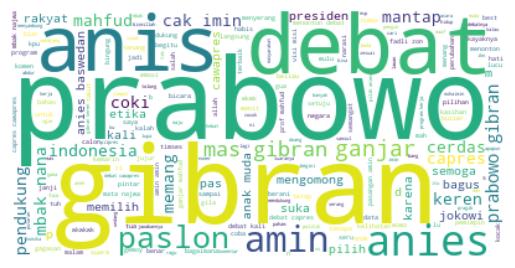

In [55]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/Users/alilsyahril/Documents/Personal_Development/Data_Science/Projects/NLP/debatcapres2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alilsyahril/Documents/Personal_Development/Data_Science/Projects/NLP/debatcapres2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


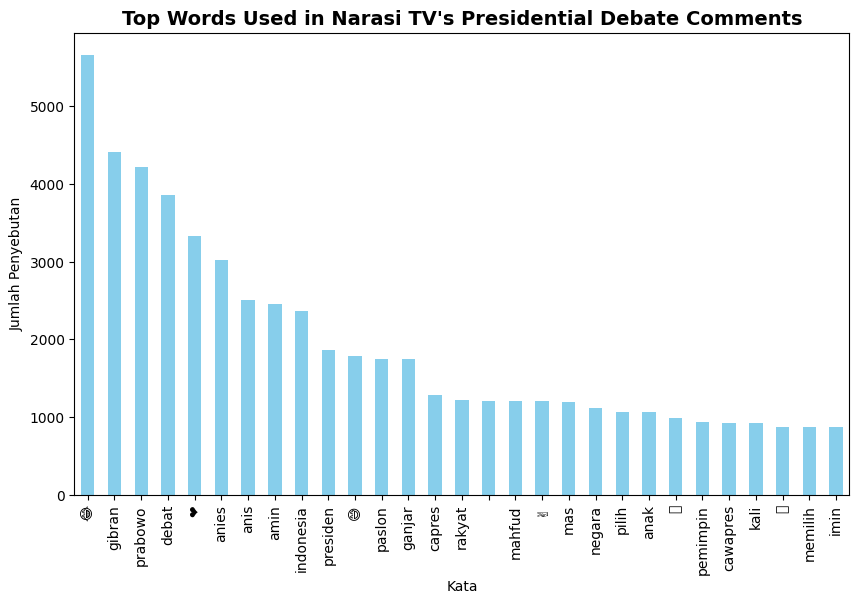

In [56]:
# Split the text into words, explode the list, and count occurrences
word_counts = df['text_fin'].str.split().explode().value_counts()

# Plotting the word counts
plt.figure(figsize=(10, 6))
word_counts[0:29].plot(kind='bar', color='skyblue')
plt.title("Top Words Used in Narasi TV's Presidential Debate Comments", fontweight='bold', fontsize=14)
plt.xlabel('Kata')
plt.ylabel('Jumlah Penyebutan')
plt.show()

In [57]:
words_01 = ['anis', 'anies', 'amin', 'imin', 'cak', 'cak imin', 'baswedan', 'muhaimin']
words_02 = ['prabowo', 'subianto', 'wowo', 'pak prabowo', 'gibran', 'samsul']
words_03 = ['ganjar', 'mahfud', 'md', 'janggar', 'mahfud md', 'pranowo']
df['contains_01'] = df['text_fin'].str.contains('|'.join(words_01))
df['contains_02'] = df['text_fin'].str.contains('|'.join(words_02))
df['contains_03'] = df['text_fin'].str.contains('|'.join(words_03))

In [58]:
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang,text_fin,contains_01,contains_02,contains_03
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini],kesini,False,False,False
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab...",mencari statement maman viral short prabowo su...,False,True,False
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]",ronde,False,False,False
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]",bismillah anies baswedan salam perubahan,True,False,False
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]",orangorang dukung prabowo,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin],amin,True,False,False
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh],huh,False,False,False
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]",amin ❤,True,False,False
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤],❤,False,False,False


### Sentiment Analysis


In [59]:
from transformers import pipeline
import tensorflow as tf

pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

nlp("Jangan sampai saya telpon bos saya ya!")

/Users/alilsyahril/Documents/Personal_Development/Data_Science/Projects/NLP/debatcapres2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[{'label': 'negative', 'score': 0.9987142086029053}]

In [60]:
x = nlp("alil goblok")
x

[{'label': 'negative', 'score': 0.9965060949325562}]

In [61]:
# convert empty string to nan
import numpy as np
df.replace('', np.nan, inplace=True)

In [62]:
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang,text_fin,contains_01,contains_02,contains_03
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini],kesini,False,False,False
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab...",mencari statement maman viral short prabowo su...,False,True,False
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]",ronde,False,False,False
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]",bismillah anies baswedan salam perubahan,True,False,False
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]",orangorang dukung prabowo,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin],amin,True,False,False
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh],huh,False,False,False
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]",amin ❤,True,False,False
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤],❤,False,False,False


In [63]:
# there are 460 comments that are null
df['text_fin'].isnull().sum()

460

In [64]:
df.dropna(subset=['text_fin'], inplace=True)

In [65]:
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang,text_fin,contains_01,contains_02,contains_03
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini],kesini,False,False,False
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab...",mencari statement maman viral short prabowo su...,False,True,False
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]",ronde,False,False,False
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]",bismillah anies baswedan salam perubahan,True,False,False
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]",orangorang dukung prabowo,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin],amin,True,False,False
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh],huh,False,False,False
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]",amin ❤,True,False,False
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤],❤,False,False,False


In [76]:
try:
  # Apply sentiment analysis to the sentence with padding (replace with your actual data)
  result = nlp([df['text_fin'].tolist()[0]], padding='longest')[0]  # Analyze only the first sentence
  df.loc[0, 'sentiment'] = result['label']  # Extract sentiment label and assign to DataFrame
except Exception as e:
  print("Error:", e)

In [81]:
try:
    df['sentiment'] = df['text_fin'].apply(lambda x: nlp(x[0:500], padding='longest')[0]['label'])
except Exception as e:
    print("Error:", e)

In [82]:
df

,author,updated_at,like_count,text,public,debate,tokens,tokens_without_slang,text_fin,contains_01,contains_02,contains_03,sentiment
0,@user-qf9nw7xo8g,2024-03-09T02:42:22Z,1,saya kesini lagi,True,1,[kesini],[kesini],kesini,False,False,False,negative
1,@user-8154,2024-03-07T15:17:25Z,0,lagi nyari ketika statement bung maman viral d...,True,1,"[mencari, statement, maman, viral, short, prab...","[mencari, statement, maman, viral, short, prab...",mencari statement maman viral short prabowo su...,False,True,False,neutral
2,@fasmaulmursolina9902,2024-03-03T14:01:17Z,0,ronde mana ya,True,1,"[ronde, ya]","[ronde, ya]",ronde,False,False,False,neutral
3,@bobamochi2679,2024-02-23T21:13:45Z,0,bismillah anies baswedan salam perubahan,True,1,"[bismillah, anies, baswedan, salam, perubahan]","[bismillah, anies, baswedan, salam, perubahan]",bismillah anies baswedan salam perubahan,True,False,False,neutral
4,@muhammadhasan3622,2024-02-18T12:55:19Z,1,kok bisa si orang orangorang pada dukung prabowo,True,1,"[sih, orang, orangorang, dukung, prabowo]","[sih, orang, orangorang, dukung, prabowo]",orangorang dukung prabowo,False,True,False,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28972,@fauzanfadiilah4635,2024-02-04T16:05:27Z,61,amin,True,5,[amin],[amin],amin,True,False,False,positive
28973,@wanmuhammadiqbal9220,2024-02-04T16:05:11Z,0,huh,True,5,[huh],[huh],huh,False,False,False,negative
28974,@user-lf8cf2ju3o,2024-02-04T16:05:04Z,76,amin❤,True,5,"[amin, ❤]","[amin, ❤]",amin ❤,True,False,False,positive
28975,@ZickyGaming,2024-02-04T16:05:03Z,26,❤,True,5,[❤],[❤],❤,False,False,False,positive


In [68]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

KeyError: 'sentiment'

In [ ]:
df.to_csv('outputs/debatcapres2_narasi_sentiment_result.csv', index=False)

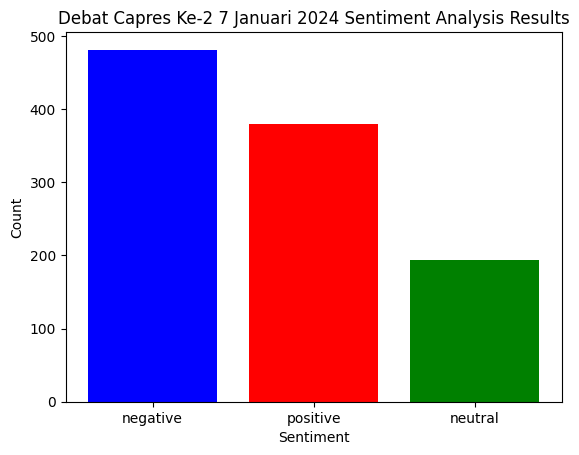

In [ ]:
# Plot the results
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Debat Capres Ke-2 7 Januari 2024 Sentiment Analysis Results')
plt.show()

In [ ]:
df['text'][df['sentiment'] == 'positive'][0:10]

3     sya sgt senang dgn hasil debat capres ke ini l...
8                            kelihatan kalii pakk bowoo
10    pak anies dikasi waktu menit menit tp selalu t...
12    pak ganjar sangat tegas dan pemberani sangat l...
15    sayapilihpanieskarenaberilmu faktaorangberilmu...
17                                   wkwkwkwkwkwk 🤣🤣🤣🤣🤣
18    tadinya saya mau dukung anis secara sukarela t...
19    punya hutang koq bangga walaupun itu sedikit a...
20    makin salut dengan pak prabowo meski didesak d...
21    debat ko nyerang personal 😂 untuk soal data pe...
Name: text, dtype: object

In [ ]:
df['text'][df['sentiment'] == 'negative'][0:10]

0     kenapa harus ada penonton nya udah gitu penont...
2     setidak nya prabowo blm ad cacat korup paslon ...
4                    anis memang berilmu tapi pembohong
5     melihat kecerdasan anis berkomunikasi menginga...
6     wkwk ini knp prabowo klarifikasi stlh kalah de...
9     itu ngambek gamau salaman pas selesai debat gw...
13    kok pak prabowo terdengar tidak menguasai topi...
14    anis bnykbacott doang dikira ngelakuin hal beg...
16    ini harusnya sasuke boruto karena sebelumnya n...
23    wkwkwkw aneh dengan paslon no diliran d debat ...
Name: text, dtype: object

In [ ]:
df['text'][df['sentiment'] == 'neutral'][0:10]

7                          wes aku pilih pak ganjar aja
11             penuh dgn buzzerny anis kayany ni komen😅
24          setuju adakan debat capres di mata najwa 👍🏻
27                                     pak anis mantul🎉
29                        seorang pemimpin harus tenang
39    insyaallah allah anis baswedan presiden indonesia
49                               we love anies ganjar 😍
77    capres atau cawapres yang emosional maka tidak...
81    bapak prabowo tidak menjawab pertanyaan anies ...
84                putaran calon menang jokowi periode 😂
Name: text, dtype: object

### Sentiment Analysis Gibran


In [ ]:
# List of words to check
words_to_check = ['prabowo']

# Check if the 'Text' column contains any word from the list
df_prabowo = df[df['text_fin'].str.contains('|'.join(words_to_check), case=False)]
df_prabowo

,author,updated_at,like_count,text,public,tokens,tokens_without_slang,text_fin,sentiment
2,@mar88shela,2024-01-07T18:21:02Z,0,setidak nya prabowo blm ad cacat korup paslon ...,True,"[setidak, nya, prabowo, belum, ada, cacat, kor...","[setidak, nya, prabowo, belum, ada, cacat, kor...",setidak prabowo belum ada cacat korup paslon ...,negative
6,@guwangpyo,2024-01-07T18:20:44Z,0,wkwk ini knp prabowo klarifikasi stlh kalah de...,True,"[wkwk, kenapa, prabowo, klarifikasi, setelah, ...","[wkwk, kenapa, prabowo, klarifikasi, setelah, ...",wkwk kenapa prabowo klarifikasi setelah kalah ...,negative
13,@basril8404,2024-01-07T18:19:52Z,1,kok pak prabowo terdengar tidak menguasai topi...,True,"[prabowo, terdengar, menguasai, topik, kali, 😢...","[prabowo, terdengar, menguasai, topik, kali, 😢...",prabowo terdengar menguasai topik kali 😢 mente...,negative
19,@deddyheriana6369,2024-01-07T18:19:13Z,0,punya hutang koq bangga walaupun itu sedikit a...,True,"[hutang, kok, bangga, percaya, hutang, negara,...","[hutang, kok, bangga, percaya, hutang, negara,...",hutang kok bangga percaya hutang negara hormat...,positive
20,@matchreporterasia9360,2024-01-07T18:19:10Z,0,makin salut dengan pak prabowo meski didesak d...,True,"[salut, prabowo, didesak, disudutkan, utusan, ...","[salut, prabowo, didesak, disudutkan, utusan, ...",salut prabowo didesak disudutkan utusan ketua ...,positive
...,...,...,...,...,...,...,...,...,...
1035,@huseinali8142,2024-01-07T16:05:27Z,280,emosional sudah sangat menyatu dengan jiwa dan...,True,"[emosional, menyatu, jiwa, kepribadian, prabow...","[emosional, menyatu, jiwa, kepribadian, prabow...",emosional menyatu jiwa kepribadian prabowo mem...,negative
1044,@lammm077,2024-01-07T16:04:25Z,15,anies skor prabowo skor ganjar skor,True,"[anies, skor, prabowo, skor, ganjar, skor]","[anies, skor, prabowo, skor, ganjar, skor]",anies skor prabowo skor ganjar skor,neutral
1059,@muftichudori7374,2024-01-07T16:02:45Z,16,yang setuju pak prabowo istirahat 😢☝,True,"[setuju, prabowo, istirahat, 😢, ☝]","[setuju, prabowo, istirahat, 😢, ☝]",setuju prabowo istirahat 😢 ☝,positive
1062,@user-oq2qb3lx6s,2024-01-07T16:02:16Z,19,yang berantem pak prabowo dan pak aniestapi ya...,True,"[berantem, prabowo, aniestapi, menang, ganjar]","[berantem, prabowo, aniestapi, menang, ganjar]",berantem prabowo aniestapi menang ganjar,neutral


In [ ]:
sentiment_prabowo = df_prabowo['sentiment'].value_counts()
sentiment_prabowo.sort_index(ascending=False)

sentiment
positive     81
neutral      47
negative    116
Name: count, dtype: int64

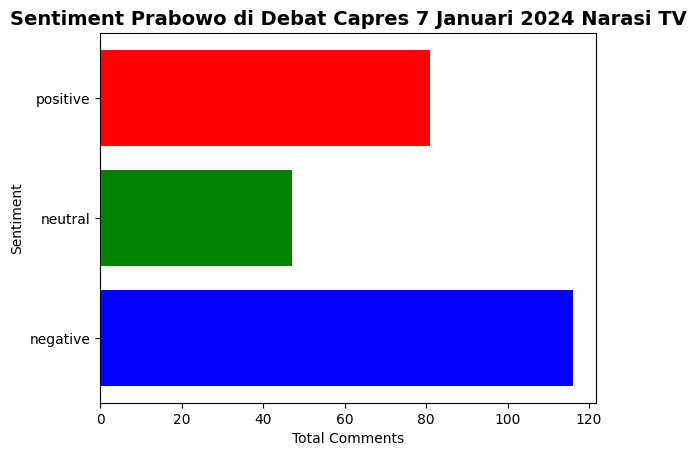

In [ ]:
# Plot the results
plt.barh(sentiment_prabowo.sort_index(ascending=True).index, sentiment_prabowo.sort_index(ascending=True).values, color=['blue', 'green', 'red'])
plt.xlabel('Total Comments')
plt.ylabel('Sentiment')
plt.title('Sentiment Prabowo di Debat Capres 7 Januari 2024 Narasi TV', fontweight='bold', fontsize=14)
plt.show()

### Sentiment Anies


In [ ]:
# List of words to check
words_anies = ['anies', 'anis']

# Check if the 'Text' column contains any word from the list
df_anies = df[df['text_fin'].str.contains('|'.join(words_anies), case=False)]
df_anies

,author,updated_at,like_count,text,public,tokens,tokens_without_slang,text_fin,sentiment
3,@opposaabiq113,2024-01-07T18:21:00Z,0,sya sgt senang dgn hasil debat capres ke ini l...,True,"[saya, sangat, senang, dengan, hasil, debat, c...","[saya, sangat, senang, dengan, hasil, debat, c...",saya sangat senang hasil debat capres cocok l...,positive
4,@tiarsahalilu1908,2024-01-07T18:21:00Z,0,anis memang berilmu tapi pembohong,True,"[anis, berilmu, pembohong]","[anis, berilmu, pembohong]",anis berilmu pembohong,negative
5,@rengezjagal,2024-01-07T18:20:44Z,1,melihat kecerdasan anis berkomunikasi menginga...,True,"[kecerdasan, anis, berkomunikasi, pemimpin, uk...","[kecerdasan, anis, berkomunikasi, pemimpin, uk...",kecerdasan anis berkomunikasi pemimpin ukraina...,negative
10,@rianiyahya2581,2024-01-07T18:20:37Z,0,pak anies dikasi waktu menit menit tp selalu t...,True,"[anies, dikasi, menit, menit, tapi, tajam, ber...","[anies, dikasi, menit, menit, tapi, tajam, ber...",anies dikasi menit menit tajam berani benar b...,positive
11,@merlinlai311,2024-01-07T18:20:13Z,0,penuh dgn buzzerny anis kayany ni komen😅,True,"[penuh, dengan, buzzerny, anis, kayany, ni, ko...","[penuh, dengan, buzzerny, anis, kayany, ni, ko...",penuh buzzerny anis kayany ni komen 😅,neutral
...,...,...,...,...,...,...,...,...,...
1050,@adenwibi9922,2024-01-07T16:03:49Z,12,bismillahirrahmanirrahim anies baswedan presid...,True,"[bismillahirrahmanirrahim, anies, baswedan, pr...","[bismillahirrahmanirrahim, anies, baswedan, pr...",bismillahirrahmanirrahim anies baswedan presid...,neutral
1053,@flagshipfleet,2024-01-07T16:03:14Z,43,“indonesia absence no more respected forever” ...,True,"[“, indonesia, absence, no, more, respected, f...","[“, indonesia, absence, no, more, respected, f...",“ indonesia absence more respected forever ” ...,neutral
1057,@MSafeii,2024-01-07T16:02:52Z,38,anies yg terbaik,True,"[anies, yang, terbaik]","[anies, yang, terbaik]",anies terbaik,positive
1058,@duansuparman5603,2024-01-07T16:02:46Z,31,capres lagi dikuliahin anies😂😂😂,True,"[capres, dikuliahin, anies, 😂, 😂, 😂]","[capres, dikuliahin, anies, 😂, 😂, 😂]",capres dikuliahin anies 😂 😂 😂,negative


In [ ]:
sentiment_anies = df_anies['sentiment'].value_counts()
sentiment_anies

sentiment
positive    130
negative    104
neutral      66
Name: count, dtype: int64

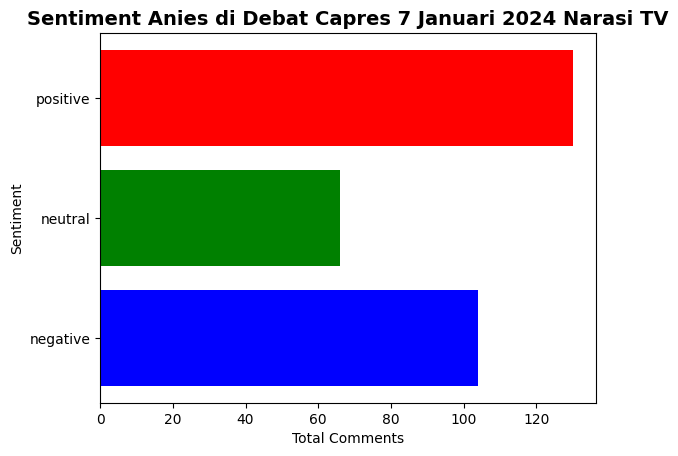

In [ ]:
# Plot the results
plt.barh(sentiment_anies.sort_index(ascending=True).index, sentiment_anies.sort_index(ascending=True).values, color=['blue', 'green', 'red'])
plt.xlabel('Total Comments')
plt.ylabel('Sentiment')
plt.title('Sentiment Anies di Debat Capres 7 Januari 2024 Narasi TV', fontweight='bold', fontsize=14)
plt.show()

### Sentiment Ganjar


In [ ]:
# List of words to check
words_ganjar = ['ganjar']

# Check if the 'Text' column contains any word from the list
df_ganjar = df[df['text_fin'].str.contains('|'.join(words_ganjar), case=False)]
df_ganjar

,author,updated_at,like_count,text,public,tokens,tokens_without_slang,text_fin,sentiment
3,@opposaabiq113,2024-01-07T18:21:00Z,0,sya sgt senang dgn hasil debat capres ke ini l...,True,"[saya, sangat, senang, dengan, hasil, debat, c...","[saya, sangat, senang, dengan, hasil, debat, c...",saya sangat senang hasil debat capres cocok l...,positive
7,@putriinka3965,2024-01-07T18:20:42Z,1,wes aku pilih pak ganjar aja,True,"[wes, pilih, ganjar, saja]","[wes, pilih, ganjar, saja]",wes pilih ganjar,neutral
12,@mulyotoga,2024-01-07T18:19:53Z,0,pak ganjar sangat tegas dan pemberani sangat l...,True,"[ganjar, pemberani, layak, memimpin, indonesia]","[ganjar, pemberani, layak, memimpin, indonesia]",ganjar pemberani layak memimpin indonesia,positive
49,@mizanhairul2083,2024-01-07T18:12:41Z,0,we love anies ganjar 😍,True,"[we, love, anies, ganjar, 😍]","[we, love, anies, ganjar, 😍]",we love anies ganjar 😍,neutral
60,@irfanfahmi9739,2024-01-07T18:11:25Z,1,tidak bisa dipungkiri ganjar keren abis malam ini,True,"[dipungkiri, ganjar, keren, habis, malam]","[dipungkiri, ganjar, keren, habis, malam]",dipungkiri ganjar keren habis malam,positive
...,...,...,...,...,...,...,...,...,...
1025,@widiartinirestii6179,2024-01-07T16:06:36Z,2,saya pilih pak anies tp debat kali ini saya ak...,True,"[pilih, anies, tapi, debat, kali, akui, ganjar...","[pilih, anies, tapi, debat, kali, akui, ganjar...",pilih anies debat kali akui ganjar berani,positive
1042,@user-oq2qb3lx6s,2024-01-07T16:04:35Z,91,keren pak ganjar rocky gerung harus minta maaf...,True,"[keren, ganjar, rocky, gerung, maaf, salah, me...","[keren, ganjar, rocky, gerung, maaf, salah, me...",keren ganjar rocky gerung maaf salah menilai w...,positive
1044,@lammm077,2024-01-07T16:04:25Z,15,anies skor prabowo skor ganjar skor,True,"[anies, skor, prabowo, skor, ganjar, skor]","[anies, skor, prabowo, skor, ganjar, skor]",anies skor prabowo skor ganjar skor,neutral
1045,@Ketokchenel-np9hz,2024-01-07T16:04:20Z,34,debat ke malam ini menurut penilaian saya yang...,True,"[debat, malam, penilaian, unggul, no, urut, ga...","[debat, malam, penilaian, unggul, no, urut, ga...",debat malam penilaian unggul urut ganjar 🤟,positive


In [ ]:
sentiment_ganjar = df_ganjar['sentiment'].value_counts()
sentiment_ganjar

sentiment
neutral     41
positive    40
negative    26
Name: count, dtype: int64

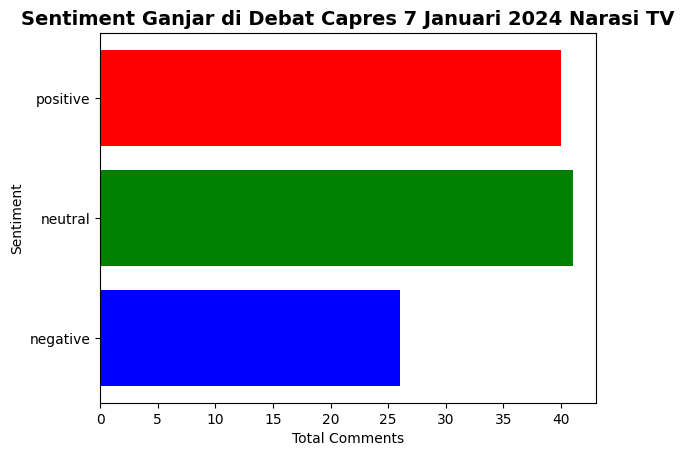

In [ ]:
# Plot the results
plt.barh(sentiment_ganjar.sort_index(ascending=True).index, sentiment_ganjar.sort_index(ascending=True).values, color=['blue', 'green', 'red'])
plt.xlabel('Total Comments')
plt.ylabel('Sentiment')
plt.title('Sentiment Ganjar di Debat Capres 7 Januari 2024 Narasi TV', fontweight='bold', fontsize=14)
plt.show()